In [1]:
import numpy as np
from scipy.optimize import minimize
from functools import partial
import matplotlib.pyplot as plt

In [2]:
def f(z, sample):
    count = 1
    for x,y in sample:
        count *= 1 / (2 * np.pi * (1 - z**2) ** 0.5) * np.e ** (-1 / (2 * ( 1 - z ** 2)) * (x ** 2 - 2 * z * x * y + y**2))
    return -count

In [3]:
def generate_normal(n_size):
    mean = (0, 0)
    cov = [[1, 1/2], [1/2, 1]]
    return np.random.multivariate_normal(mean, cov, n_size)

def max_likehood(sample):
    fx = partial(f, sample=sample)
    x0 = np.array([0.5])
    res = minimize(fx, x0, method='nelder-mead',
                   options={'xatol': 1e-8, 'disp': True})
    return res.x[0]

def cov(sample):
    xs, ys = 0, 0
    for x, y in sample:
        xs += x
        ys += y
    xs, ys = xs / len(sample), ys / len(sample)
    p = 0
    for x, y in sample:
        p += (x - xs) * (y - ys)
    return p / len(sample)

In [8]:
x, y_1, y_2 = [], [], []
for size in range(10, 1000, 50):
    sample = generate_normal(size)
    x.append(size)
    y_1.append(max_likehood(sample))
    y_2.append(cov(sample))

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 25
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 23
         Function evaluations: 68
Optimization terminated suc

# Сравнение метода моментов и метода максимального правдоподобия
### Оранжевая линия - оценка по методу моментов, синяя линия - оценка по методу максимального правдоподобия
Для сравнения были взят случайный вектор из двух компонент из нормального распределения, с средним 0 и дисперсией 1 и ковариационной матрицей [[1, 1/2], [1/2, 1]].

Видно, что с какого-то момента оценка максимального правдоподобия всегда уходит в истинную оценку, когда оценка по методу моментов сходится к истинному значению.

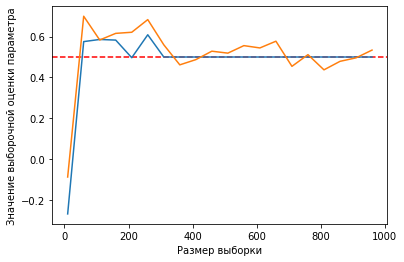

In [9]:
plt.axhline(y=0.5, color='r', linestyle='--')
plt.plot(x, y_1)
plt.plot(x, y_2);
plt.xlabel('Размер выборки')
plt.ylabel('Значение выборочной оценки параметра');